## 2.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data into the dataframe 'df' with the date column being parsed as soon as it is read using the "parse_dates" parameter

In [2]:
df = pd.read_csv('week2.csv',low_memory=False,parse_dates=['Date'])
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change,Trend,Year,Month
0,EICHERMOT,EQ,2017-05-15,29178.35,29403.10,29455.00,28831.00,28915.05,28930.60,29015.64,20026,5.810673e+08,8495,8193,40.91,0.000000,Slight or no Change,2017,5
1,EICHERMOT,EQ,2017-05-16,28930.60,28920.45,29450.00,28820.00,29365.95,29362.50,29107.91,36189,1.053386e+09,11584,16359,45.20,1.492883,Positive,2017,5
2,EICHERMOT,EQ,2017-05-17,29362.50,29262.00,29300.00,28971.35,28982.05,29093.55,29116.26,18545,5.399610e+08,7918,10611,57.22,-0.915964,Slight Negative,2017,5
3,EICHERMOT,EQ,2017-05-18,29093.55,28900.00,28998.85,28213.00,28213.00,28357.30,28521.49,30153,8.600085e+08,11283,15761,52.27,-2.530630,Negative,2017,5
4,EICHERMOT,EQ,2017-05-19,28357.30,28698.00,28698.00,27756.00,27915.00,27936.05,28024.04,44251,1.240092e+09,21721,20153,45.54,-1.485508,Negative,2017,5


Plotting the Closing Price of the stock for each day in the dataframe

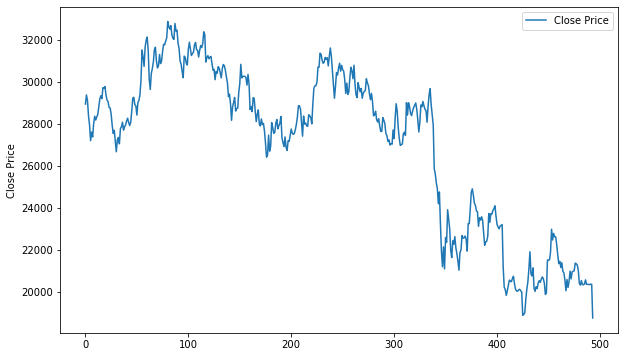

In [3]:
df.plot(y="Close Price",use_index=True,figsize=(10,6))
plt.ylabel("Close Price")

plt.show()

## 2.2

The following stem plot shows the variation in the daily percentage changes in the stock's Closing prices for the 493 days

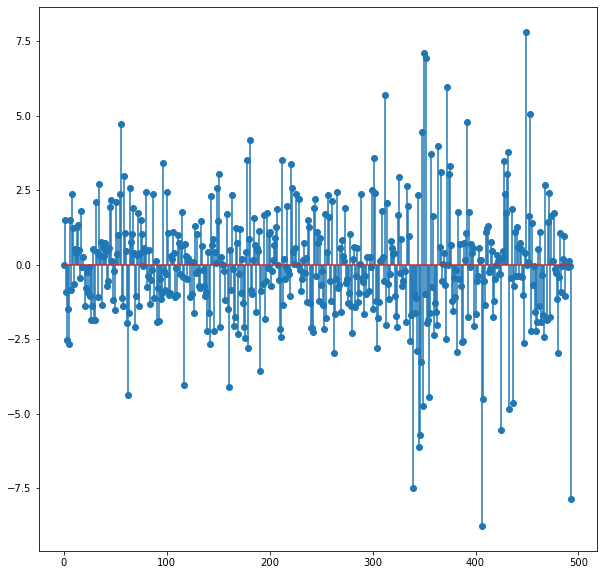

In [5]:
plt.figure(figsize=(10,10))
ax2 = plt.stem(df['Day_Perc_Change'],use_line_collection=True,label='Day_Perc_Change')  
plt.show()

## 2.3

Total Traded Quantity or the volume is being plotted for all the days here.

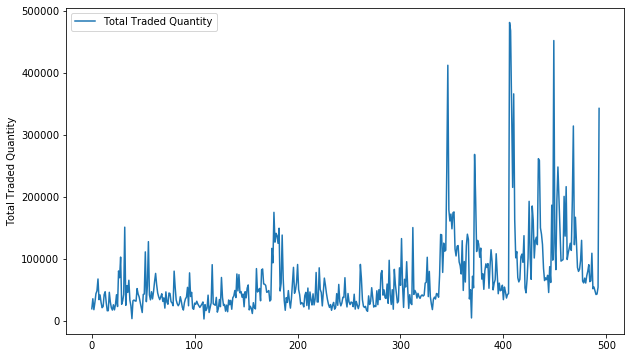

In [5]:
ax = df.plot(y='Total Traded Quantity',use_index=True,figsize=(10,6))
ax.set_ylabel("Total Traded Quantity")
plt.show()

The previous two plots are combined so as to represent them in a single plot. 
Subplots were used for this purpose. 
The data from the "Total Traded Quantity" column had to be normalized against the percentage_change field so that the scale was somewhat similar for the data from both of these columns

<ipython-input-6-a90c7444050a>:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax1.stem(t, d1)


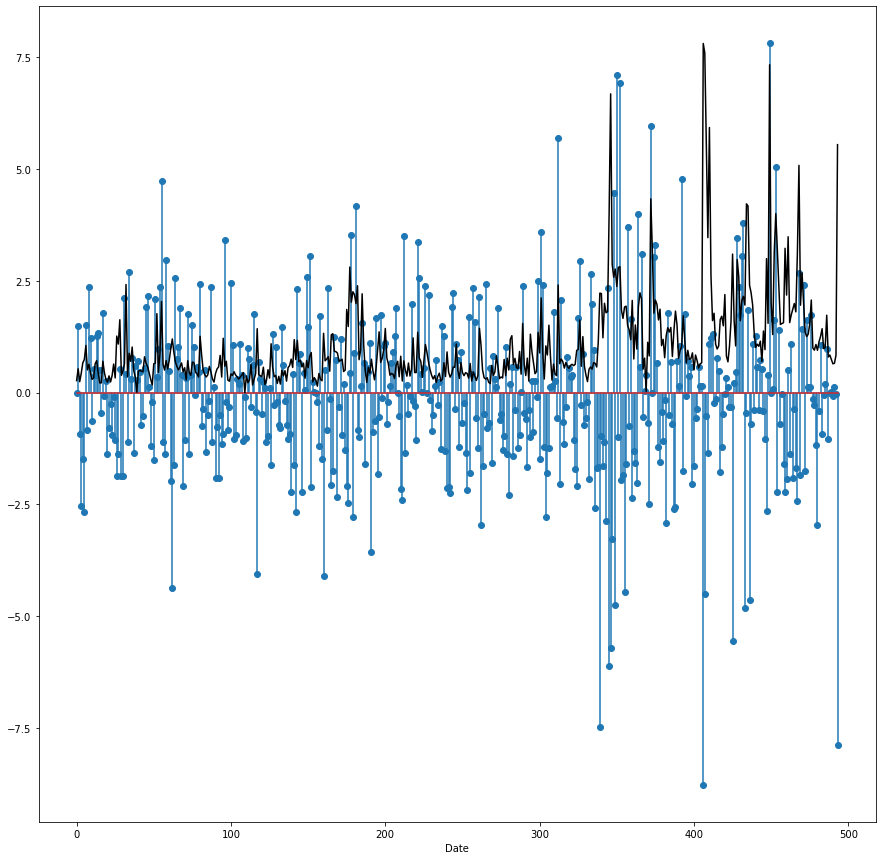

In [6]:
date = "Date"
stem_value = "Day_Perc_Change"
plot_value = "Total Traded Quantity"
t = df.index.values
d1= df[stem_value]
d2 = df[plot_value]

d2 =  df["Total Traded Quantity"] - df["Total Traded Quantity"].min()
d2 = d2/d2.max() * df.Day_Perc_Change.max()

fig, ax1 = plt.subplots(figsize=(15,15))


color = 'blue'
ax1.set_xlabel(date)

ax1.stem(t, d1)

color = 'black'

ax1.plot(t, d2, color=color)

plt.show()

## 2.4

In [7]:
df2 = df.groupby(['Trend']).count()
df2 = df2[['Date']]
df2

,Date
Trend,
Among top gainers,22
Among top losers,13
Bear drop,3
Bull run,2
Negative,122
Positive,93
Slight Negative,53
Slight Positive,48
Slight or no Change,138


A Pie chart is plotted to visualize the occurences of "Trends" we set for the Stock in the previous module

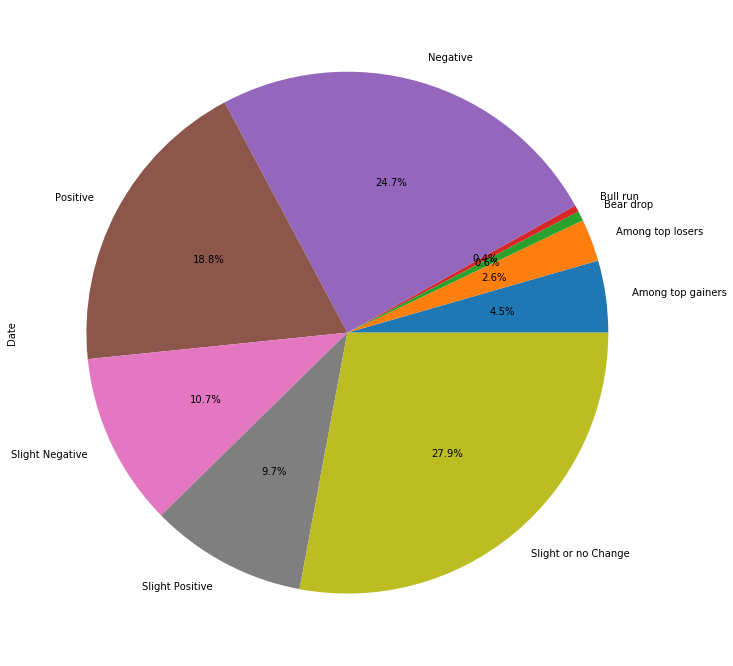

In [13]:
df2.plot(kind='pie',y='Date',figsize=(12,12),legend=False,autopct='%.1f%%')

Now the Volume of stocks will be grouped together according to the "Trends" above and we will compute the mean and median values for similar Trends.

In [9]:
dfmed = df.groupby('Trend').median()
dfmed = dfmed [['Total Traded Quantity']]
dfmean = df.groupby('Trend').mean()
dfmean = dfmean [['Total Traded Quantity']]

 A bar plot for the median of the above computed values grouped together according to the Trends

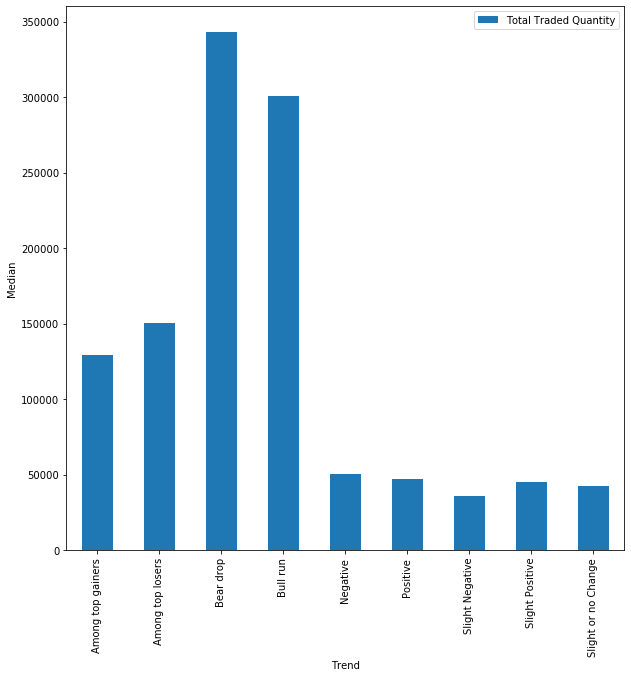

In [10]:
dfmed.plot(kind='bar',y='Total Traded Quantity',figsize=(10,10))
plt.ylabel('Median')
plt.show()

A bar plot for the mean of the above computed values grouped together according to the Trends

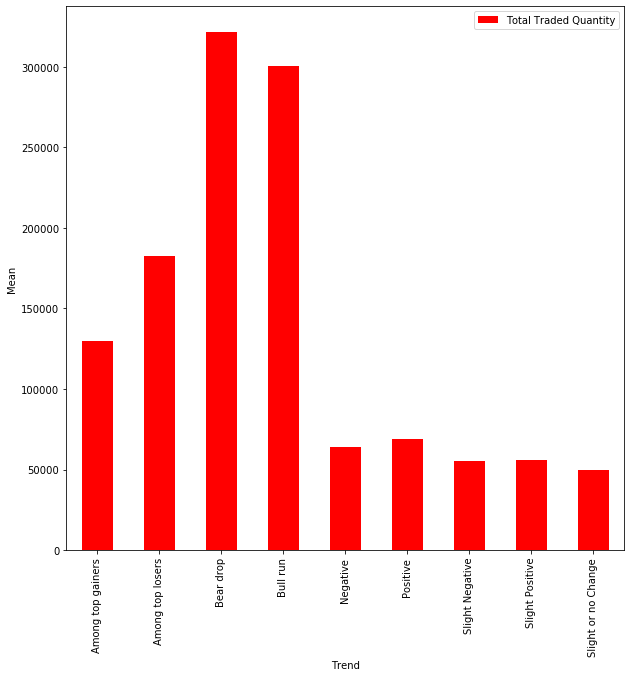

In [11]:
ax = dfmean.plot(kind='bar',y='Total Traded Quantity',color='red',figsize=(10,10))
plt.ylabel('Mean')
plt.show()

## 2.5

Histogram to understand the frequency of the range of values taken by the percentage_change of Closing price fo the stocks 

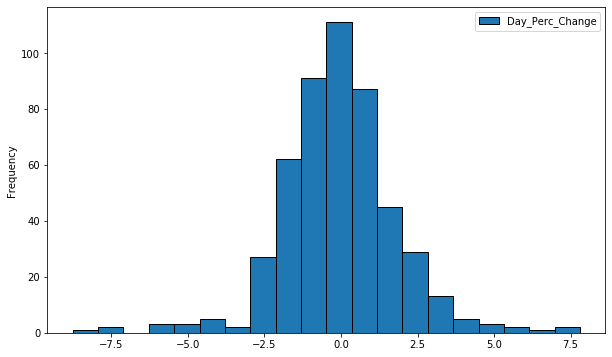

In [22]:
bin = np.linspace(df[['Day_Perc_Change']].min(),df[['Day_Perc_Change']].max(),20)
df.plot(kind='hist',y='Day_Perc_Change',bins=len(bin),edgecolor='black',figsize=(10,6))

## 2.6

Reading 5 stocks into separate dataframes which will be to used to analyse the correlation between the percentage changes for these 5 stocks with the one we chose.

In [23]:
df1 = pd.read_csv('Mid_Cap\APOLLOTYRE.csv')
df2 = pd.read_csv('Mid_Cap\CASTROLIND.csv')
df3 = pd.read_csv('Mid_Cap\AMARAJABAT.csv')
df4 = pd.read_csv('Mid_Cap\TATAPOWER.csv')
df5 = pd.read_csv('Mid_Cap\EXIDEIND.csv')

In [14]:
df1 = df1[df1.Series == 'EQ']
df2 = df2[df2.Series == 'EQ']
df3 = df3[df3.Series == 'EQ']
df4 = df4[df4.Series == 'EQ']
df5 = df5[df5.Series == 'EQ']

df1.rename(columns={'Close Price':'ApolloCP'},inplace=True)
df2.rename(columns={'Close Price':'CastrolCP'},inplace=True)
df3.rename(columns={'Close Price':'AmarajabatCP'},inplace=True)
df4.rename(columns={'Close Price':'TatapowerCP'},inplace=True)
df5.rename(columns={'Close Price':'ExideCP'},inplace=True)

In [15]:
dfn = pd.concat([df1[['ApolloCP']],df2[['CastrolCP']],df3[['AmarajabatCP']],df4[['TatapowerCP']],df5[['ExideCP']]], axis=1, sort=False)

In [16]:
dfn = dfn.dropna()
dfn = dfn.reset_index()
dfn.drop(columns=['index'],inplace=True)

So we added the closing Price for these stocks into a single dataframe and now we're going to calculate the percentage change for all these stocks as required.

In [17]:
dfpc1 = dfn[['ApolloCP']].pct_change()
dfpc2 = dfn[['CastrolCP']].pct_change()
dfpc3 = dfn[['AmarajabatCP']].pct_change()
dfpc4 = dfn[['TatapowerCP']].pct_change()
dfpc5 = dfn[['ExideCP']].pct_change()

dfpc = pd.concat([dfpc1[['ApolloCP']],dfpc2[['CastrolCP']],dfpc3[['AmarajabatCP']],dfpc4[['TatapowerCP']],dfpc5[['ExideCP']]], axis=1, sort=False)
dfpc.head()

,ApolloCP,CastrolCP,AmarajabatCP,TatapowerCP,ExideCP
0,NaN,NaN,NaN,NaN,NaN
1,0.010781,-0.015227,-0.009321,0.003591,-0.004475
2,0.012585,-0.007788,0.014059,0.017889,-0.006130
3,-0.019802,-0.012740,-0.027301,-0.018746,-0.013775
4,0.008597,0.007259,-0.017926,0.004776,-0.007088


In [18]:
dfpc.rename(columns={'ApolloCP':'ApolloPC'},inplace=True)
dfpc.rename(columns={'CastrolCP':'CastrolPC'},inplace=True)
dfpc.rename(columns={'AmarajabatCP':'AmarajabatPC'},inplace=True)
dfpc.rename(columns={'TatapowerCP':'TatapowerPC'},inplace=True)
dfpc.rename(columns={'ExideCP':'ExidePC'},inplace=True)

Drpping any NaN values since they are irrelevant to us.

In [19]:
dfpc = dfpc.dropna()
dfpc = dfpc.reset_index(drop=True)
dfpc.head()

,ApolloPC,CastrolPC,AmarajabatPC,TatapowerPC,ExidePC
0,0.010781,-0.015227,-0.009321,0.003591,-0.004475
1,0.012585,-0.007788,0.014059,0.017889,-0.006130
2,-0.019802,-0.012740,-0.027301,-0.018746,-0.013775
3,0.008597,0.007259,-0.017926,0.004776,-0.007088
4,-0.003835,-0.027797,-0.020151,-0.024955,-0.030863


The pairplot function in the seaborn library makes our job really simple. It creates a pairwise plot for all the columns of the dataframe.


The diagonals are the simply what you get if you plot a histogram for them (the Y axis values correspond to the scatterplot values and not what you may get with a normla histogram though).


The rest of the plots are the scatter plots of two columns taken at a time.

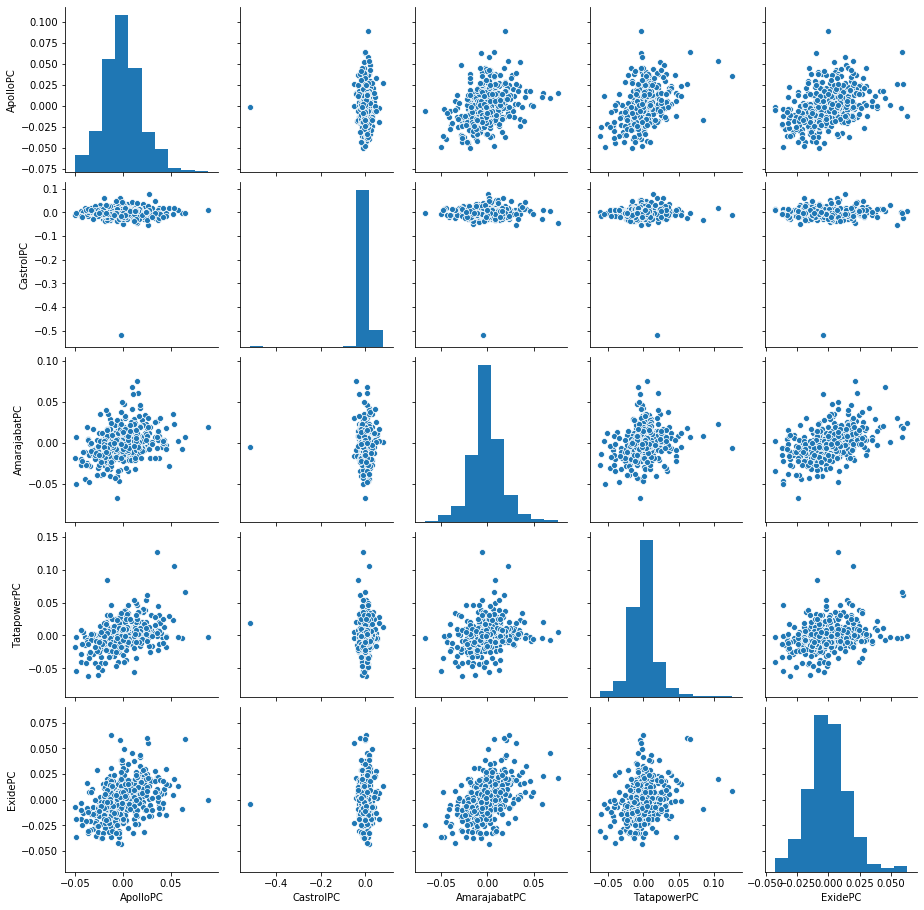

In [20]:
sns.pairplot(dfpc)

## 2.7

Calculating the 7 day rolling average of the percentage changes in the Closing prices for the Exide stock

In [21]:
dfpc['ExideR'] = dfpc['ExidePC'].rolling(window=7,center=False).mean()

In [22]:
dfr = dfpc[['ExideR']]
dfr.dropna(inplace=True)
dfr = dfr.reset_index()
dfr

<ipython-input-22-7c13a60d1317>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr.dropna(inplace=True)


,index,ExideR
0,6,-0.014308
1,7,-0.010036
2,8,-0.005680
3,9,-0.006712
4,10,-0.006387
...,...,...
480,486,-0.003444
481,487,-0.003645
482,488,-0.003119
483,489,-0.002580


Now the standard deviation for the same is being calculated here.

In [23]:
dfpc['ExideSTD'] = dfpc['ExidePC'].rolling(window=7,center=False).std()
dfstd = dfpc[['ExideSTD']]
dfstd.dropna(inplace=True)
dfstd = dfstd.reset_index()
dfstd.drop(columns='index',inplace=True)
dfstd

<ipython-input-23-8eb5715a987e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstd.dropna(inplace=True)


,ExideSTD
0,0.009546
1,0.017803
2,0.022124
3,0.022725
4,0.022735
...,...
480,0.012477
481,0.012774
482,0.013176
483,0.013313


A plot for the rolling standard deviation of the percentage changes in the Closing Prices

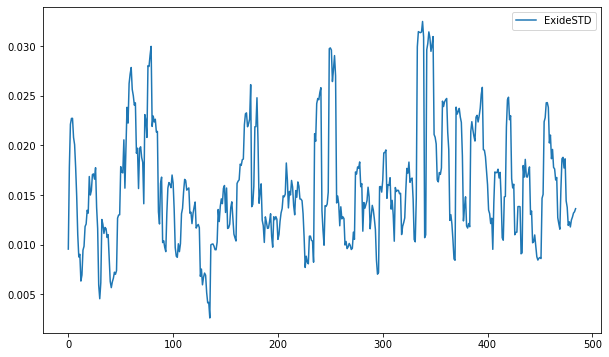

In [24]:
dfstd.plot(y='ExideSTD',use_index=True,figsize=(10,6))

Plot for the Rolling mean of the percentage changes of the Closing Price in the Stock

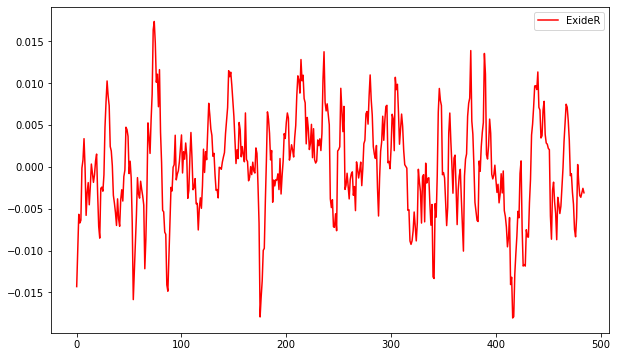

In [25]:
dfr.plot(y='ExideR',use_index=True,color='red',figsize=(10,6))

## 2.8

Reading the Stock Nitfy50 in the dataframe

In [26]:
df= pd.read_csv('Nifty50/Nifty50.csv')
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [27]:
dfn = df[['Close']].pct_change()
dfn = dfn.rolling(window=7,center=False).std()
dfn

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
489,0.006664
490,0.007408
491,0.004605
492,0.004363


In [28]:
dfn.dropna(inplace=True)
dfn = dfn.reset_index()
dfn.drop(columns='index',inplace=True)
dfn.rename({'Close':'NiftySTD'}, axis=1, inplace=True)
dfn

,NiftySTD
0,0.005509
1,0.008139
2,0.008831
3,0.007363
4,0.007268
...,...
482,0.006664
483,0.007408
484,0.004605
485,0.004363


The Standard deviation of the Nifty and Exide stocks are being plotted together using subplots to get an idea of the Volatility of the Exide stock with respect to the market.

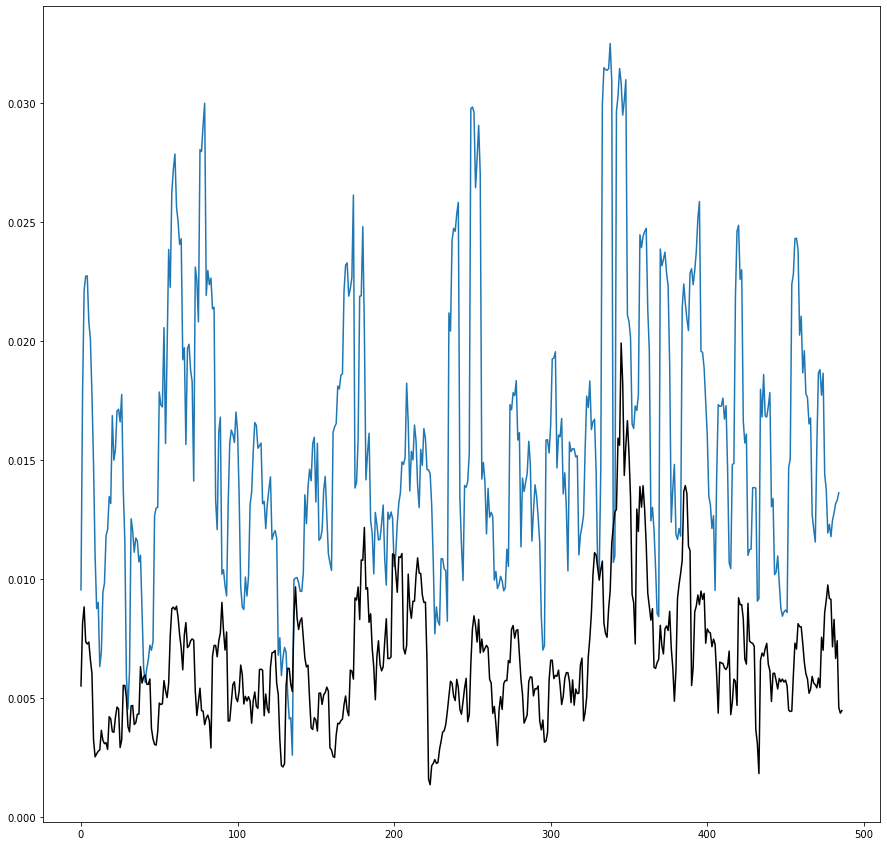

In [29]:
fig, ax1 = plt.subplots(figsize=(15,15))
color = 'blue'
d1 = dfstd['ExideSTD'] 
d2 = dfn['NiftySTD']
ax1.plot( d1)

color = 'black'

ax1.plot( d2, color=color)

plt.show()

## 2.9

Now to assign a Call, we're going to get the 21 and 34 day rolling mean of the Closing Prices of the stock which will be called the Lower moving Average and the Higher Moving Average respectively. 

This is indicated by "Exidelw" and "Exideuw" in the dataframe

In [30]:
dfpc['Exidelw'] = df5['ExideCP'].rolling(window=21,center=False).mean()
dfpc['Exideuw'] = df5['ExideCP'].rolling(window=34,center=False).mean()
dfls= dfpc[['Exidelw','Exideuw']]

In [31]:
dfls = dfls.dropna()
dfls = dfls.reset_index()
dfls.drop(columns='index',inplace=True)
dfls

,Exidelw,Exideuw
0,222.788095,226.983824
1,222.571429,226.327941
2,222.526190,225.785294
3,222.569048,225.347059
4,222.783333,225.011765
...,...,...
453,217.873810,221.050000
454,217.778571,220.769118
455,217.776190,220.329412
456,217.661905,219.804412


Now the call will be assgined here.

Whenever the Lower Moving avg is greater than the Upper Moving avg, the call will be Buy otherwise it will be Sell.

In [32]:
li= []

for i, row in dfls.iterrows():
    if(row['Exidelw']>row['Exideuw']):
        li.append('Buy')
    else:
        li.append('Sell')
        
dfls['Call'] = li

dfls

,Exidelw,Exideuw,Call
0,222.788095,226.983824,Sell
1,222.571429,226.327941,Sell
2,222.526190,225.785294,Sell
3,222.569048,225.347059,Sell
4,222.783333,225.011765,Sell
...,...,...,...
453,217.873810,221.050000,Sell
454,217.778571,220.769118,Sell
455,217.776190,220.329412,Sell
456,217.661905,219.804412,Sell


Now to plot the same we'll be using subplots again.

Whenever Exidelw exceeds Exideuw, we'll use a green marker '^' to indicate the same, otherwise an orange 'v' is used.

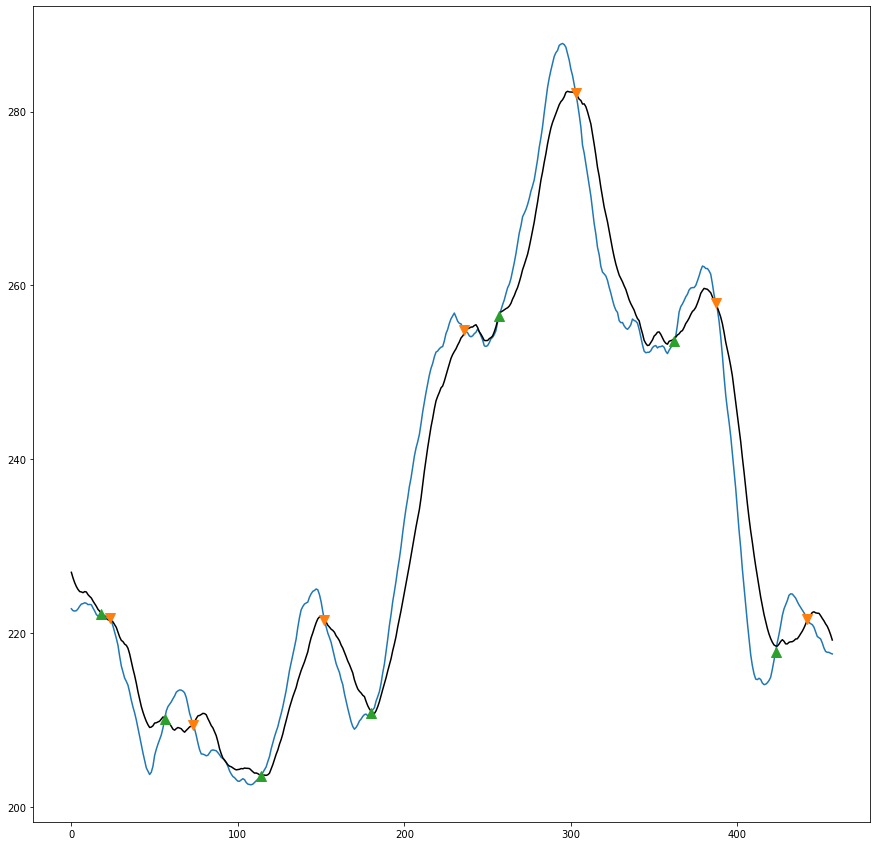

In [33]:
fig, ax1 = plt.subplots(figsize=(15,15))
color = 'blue'
d1 = dfls['Exidelw'] 
d2 = dfls['Exideuw']
ax1.plot( d1)

color = 'black'

ax1.plot( d2, color=color)

b = np.argwhere(np.diff(np.sign(d1 - d2))<0).flatten()
s = np.argwhere(np.diff(np.sign(d1 - d2))>0).flatten()

plt.plot(d1[b], 'v',markersize=10)
plt.plot(d1[s], '^',markersize=10)

plt.show()

## 2.10

Now we will be making use of Bollinger bands.

In [34]:
dff = df5[['ExideCP']].rolling(window=14,center=False).mean()

Calculating the 14 day rolling Standard deviation.

In [35]:
dff['ExideStd'] = df5[['ExideCP']].rolling(window=14,center=False).std()
dff['ADSP'] = df5['Average Price']
dff = dff.dropna()
dff = dff.reset_index()
dff.drop(columns='index',inplace=True)
dff

,ExideCP,ExideStd,ADSP
0,233.353571,7.576697,229.09
1,232.025000,6.819225,228.52
2,230.789286,5.843345,227.90
3,229.414286,4.884529,225.70
4,228.250000,4.082514,223.95
...,...,...,...
476,217.771429,4.727689,214.00
477,216.875000,5.249826,208.91
478,215.696429,4.804384,208.83
479,214.478571,3.679763,212.00


The upper and the lower value of the band at each row in the dataframe.

In [36]:
a = np.array(dff['ExideCP'])
b = np.array(dff['ExideStd'])
dff['Exideup'] = a+2*b
dff['Exidelw'] = a-2*b
dff

,ExideCP,ExideStd,ADSP,Exideup,Exidelw
0,233.353571,7.576697,229.09,248.506965,218.200178
1,232.025000,6.819225,228.52,245.663450,218.386550
2,230.789286,5.843345,227.90,242.475976,219.102595
3,229.414286,4.884529,225.70,239.183344,219.645227
4,228.250000,4.082514,223.95,236.415029,220.084971
...,...,...,...,...,...
476,217.771429,4.727689,214.00,227.226807,208.316050
477,216.875000,5.249826,208.91,227.374652,206.375348
478,215.696429,4.804384,208.83,225.305196,206.087661
479,214.478571,3.679763,212.00,221.838098,207.119044


Plotting all these values together using subplots

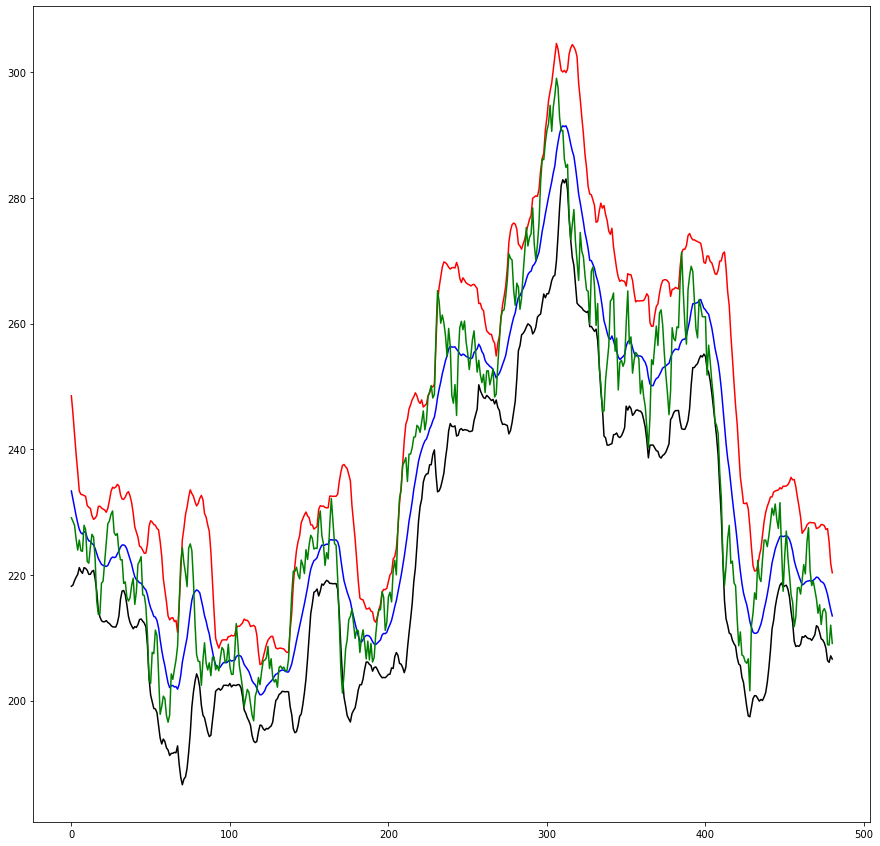

In [37]:
fig, ax1 = plt.subplots(figsize=(15,15))

d1 = dff['ExideCP'] 
d2 = dff['Exidelw']
d3 = dff['Exideup']
d4 = dff['ADSP']

ax1.plot( d1,color='blue')

color = 'black'

ax1.plot( d2, color=color)


plt.plot(d3 , color='red')
plt.plot(d4, color='green')

plt.show()

In [38]:
dfls

,Exidelw,Exideuw,Call
0,222.788095,226.983824,Sell
1,222.571429,226.327941,Sell
2,222.526190,225.785294,Sell
3,222.569048,225.347059,Sell
4,222.783333,225.011765,Sell
...,...,...,...
453,217.873810,221.050000,Sell
454,217.778571,220.769118,Sell
455,217.776190,220.329412,Sell
456,217.661905,219.804412,Sell


In [39]:
dfls.to_csv('week3.csv') 
dff.to_csv('bollinger.csv')